# Getting started with *uproot4*

In this notebook, we will see how ROOT files can be viewed using [uproot4](https://github.com/scikit-hep/uproot4) python package. 

More help on how to use the package can be found in https://uproot.readthedocs.io/en/latest/index.html. Here we will give a few simple examples that will be used during the project.

If needed, install the package using:
```
!python -m pip install uproot4
```


In [1]:
#import uproot
import uproot4
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
import mplhep as hep

Explore the content of the file:

In [2]:
# relace next line with the path to your file (files that start with SD are diffractive events)
#path='data'
path='/eos/cms/store/user/mpitt/CERNSummerStudentProject2022'
filename=path+'/SD_Wquark_pt20GeV.root'

In [3]:
#open the file, using uproot
root_=uproot4.open( filename )

Now inspect the conten of the file:

In [4]:
root_.keys()

['LHEF;1']

In the selected file, we have a tree named `Delphes`, let's get the tree and see the branches:

In [5]:
tree_ = root_["LHEF"]

In [6]:
tree_.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Event                | TClonesArray             | AsGroup(<TBranchElement 'Ev...
Event/Event.fUniq... | uint32_t[]               | AsJagged(AsDtype('>u4'))
Event/Event.fBits    | uint32_t[]               | AsJagged(AsDtype('>u4'))
Event/Event.Number   | int64_t[]                | AsJagged(AsDtype('>i8'))
Event/Event.Npart... | int32_t[]                | AsJagged(AsDtype('>i4'))
Event/Event.Proce... | int32_t[]                | AsJagged(AsDtype('>i4'))
Event/Event.Weight   | double[]                 | AsJagged(AsDtype('>f8'))
Event/Event.ScalePDF | double[]                 | AsJagged(AsDtype('>f8'))
Event/Event.Coupl... | double[]                 | AsJagged(AsDtype('>f8'))
Event/Event.Coupl... | double[]                 | AsJagged(AsDtype('>f8'))
Event_size           | int32_t                  | AsDtype('>i4')
Rwgt             

A shorter option to read a tree from a file is:
```
tree_ = uproot4.open(filename+":LHEF")
```

To see the content of a single variable (we will see the number of verteces in each event):

In [7]:
particle_size = tree_['Particle_size'].array()
print(particle_size)

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, ... 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


## Convert ROOT to pandas dataframe

export the ROOT file content into pandas dataframe:


In [8]:
df = tree_.arrays(['Particle_size','Particle.Pz','Particle.PT','Particle.Eta','Particle.Phi','Particle.PID','Particle.Status'], library="pd")

Where the `Particle.PID` is a type of a particle following the MonteCarlo particle ID shceme from [here](https://pdg.lbl.gov/2007/reviews/montecarlorpp.pdf), while the `Particle.Status` follows Pythia8 conventions as described [here](https://pythia.org/latest-manual/ParticleProperties.html):
   * incomming partons have status = -1
   * outgoing particles have status = 1
 

###  Working with pandas dataframe

In [9]:
df.head(20)

Particle_size  Particle.Pz   Particle.PT  Particle.Eta  \
entry subentry                                                           
0     0                    10  6485.735177  3.644703e-01     10.479818   
      1                    10 -6485.735177  3.644703e-01    -10.479818   
      2                    10   314.264646  3.644703e-01      7.452693   
      3                    10 -6799.999823  1.709392e-15   -999.900000   
      4                    10    72.520475  8.410606e-02      7.452693   
      5                    10   -79.599982  4.393972e-10   -999.900000   
      6                    10   -24.051707  5.060008e+01     -0.459038   
      7                    10    16.972200  5.067329e+01      0.328968   
      8                    10    27.199134  3.648157e+01      0.689590   
      9                    10   -51.250841  1.417279e+01     -1.997148   
1     0                    10  5612.184192  4.476528e-01     10.129580   
      1                    10 -5612.184192  4.476528e-01    -10.129580   
      2                    10  6799.999877  5.167030e-16    999.900000   
      3                    10 -1187.815685  4.476528e-01     -8.576756   
      4                    10    69.600443  1.248481e-10    999.900000   
      5                    10  -109.473698  4.125741e-02     -8.576756   
      6                    10   -11.989335  6.592189e+01     -0.180884   
      7                    10   -27.883919  6.595220e+01     -0.411111   
      8                    10    13.514561  1.916236e+01      0.656975   
      9                    10   -25.503896  8.004023e+01     -0.313479   

                Particle.Phi  Particle.PID  Particle.Status  
entry subentry                                               
0     0             2.550971          2212                1  
      1            -0.590622       9902210                2  
      2            -0.590622           990                2  
      3            -0.565484          2212                2  
      4            -0.590622            21               -1  
      5             2.550971            -2               -1  
      6             2.035994           -24                2  
      7            -1.104781            -1                1  
      8             2.007149            13                1  
      9             2.110300           -14                1  
1     0             2.859431       9902210                2  
      1            -0.282161          2212                1  
      2             2.883585          2212                2  
      3             2.859431           990                2  
      4            -0.282161            21               -1  
      5             2.859431            -3               -1  
      6            -1.027974            24                2  
      7             2.114043            -4                1  
      8             2.949761           -11                1  
      9            -0.849370            12                1

Since we are interested only in incoming and outgoing particles, we will keep only particle with status -1 or 1

In [10]:
particles = tree_.arrays(['Particle.Pz','Particle.PT','Particle.Eta','Particle.Phi','Particle.PID','Particle.Status'],  cut="Particle.Status<2")

In [11]:
df=ak.to_pandas(particles)
df.head(18)

Particle.Pz   Particle.PT  Particle.Eta  Particle.Phi  \
entry subentry                                                          
0     0         6485.735177  3.644703e-01     10.479818      2.550971   
      1           72.520475  8.410606e-02      7.452693     -0.590622   
      2          -79.599982  4.393972e-10   -999.900000      2.550971   
      3           16.972200  5.067329e+01      0.328968     -1.104781   
      4           27.199134  3.648157e+01      0.689590      2.007149   
      5          -51.250841  1.417279e+01     -1.997148      2.110300   
1     0        -5612.184192  4.476528e-01    -10.129580     -0.282161   
      1           69.600443  1.248481e-10    999.900000     -0.282161   
      2         -109.473698  4.125741e-02     -8.576756      2.859431   
      3          -27.883919  6.595220e+01     -0.411111      2.114043   
      4           13.514561  1.916236e+01      0.656975      2.949761   
      5          -25.503896  8.004023e+01     -0.313479     -0.849370   
2     0         6386.653323  8.958930e-02     11.867632     -0.164051   
      1           37.903741  8.215308e-03      9.129953      2.977542   
      2         -122.967680  1.268559e-10   -999.900000     -0.164051   
      3           11.936160  2.486300e+01      0.463322      1.159931   
      4            9.212844  1.842861e+01      0.481141      2.227182   
      5         -106.212943  3.741451e+01     -1.766205     -1.535836   

                Particle.PID  Particle.Status  
entry subentry                                 
0     0                 2212                1  
      1                   21               -1  
      2                   -2               -1  
      3                   -1                1  
      4                   13                1  
      5                  -14                1  
1     0                 2212                1  
      1                   21               -1  
      2                   -3               -1  
      3                   -4                1  
      4                  -11                1  
      5                   12                1  
2     0                 2212                1  
      1                   21               -1  
      2                   -2               -1  
      3                   -1                1  
      4                   15                1  
      5                  -16                1

NOTE:
   * first entry - proton
   * third entry - outgoing quark
   * fourth entry - outgoing lepton / quark
   
 We can plot PID of the third entry:
 

W+c / W+any jet = 0.047


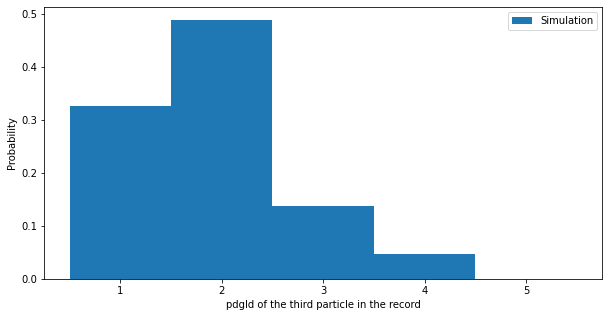

In [12]:
f, ax = plt.subplots(figsize=(10,5))
h = plt.hist([ x['Particle.PID'][2] for x in particles], bins=np.linspace(0.5,5.5,num=6),label='Simulation', density=True)
ax.legend(); 
ax.set(xlabel='pdgId of the third particle in the record', ylabel='Probability')
plt.savefig('WJet_fraction.png')
print('W+c / W+any jet = %2.3f'%h[0][3])

### Working with arrays

We loop over all events and compute number of particles in event

In [13]:
n_events = len(particles)
print('number of events = %d'%n_events)

number of events = 10000


In [14]:
n_particles = np.zeros(n_events)
for i in range(n_events):
    n_particles[i] = len(particles[i]['Particle.Pz'])

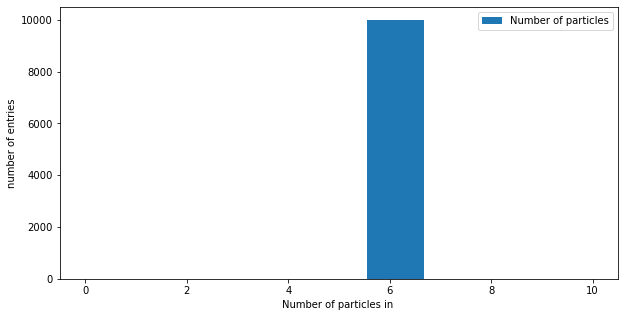

In [15]:
#lets draw hisgorgam of new number of particles:
f, ax = plt.subplots(figsize=(10,5))
plt.hist(n_particles, bins=np.linspace(0,10,10),label='Number of particles')
ax.legend(); 
ax.set(xlabel='Number of particles in ', ylabel='number of entries')
plt.savefig('number_filter_particles.png')

Next we want to plot outgoing proton momentum loss (defined as $\xi = 1 - |p_z| / 6800$ )

In [16]:
proton_xi = np.zeros(n_events)
for i in range(n_events):
    for pz, pid in zip(particles[i]['Particle.Pz'],particles[i]['Particle.PID']):
        if pid == 2212: proton_xi[i] = 1 - np.abs(pz)/6800.

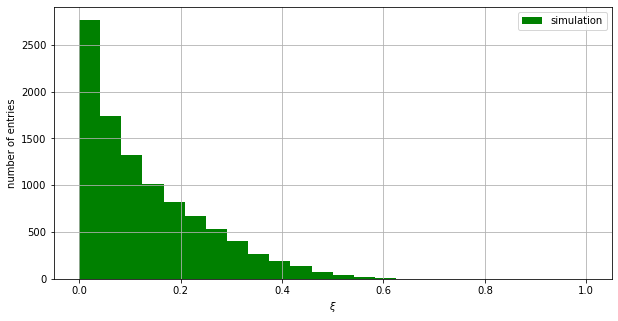

In [17]:
#lets draw hisgorgam of outgoing proton momentum loss:
f, ax = plt.subplots(figsize=(10,5))
plt.hist(proton_xi, bins=np.linspace(0,1,25),label='simulation',  color='g')
ax.legend(); plt.grid(True)
ax.set(xlabel=r'$\xi$', ylabel='number of entries')
plt.savefig('proton_xi.png')

Our forward proton detector acceptance is betweeen 0.03 to 0.15

In [18]:
#acceptance:
sum(proton_xi>0.03) / len(proton_xi)

0.7814

## Correlation between quark and proton

In [19]:
def isQuark(pid):
    if np.abs(pid)<6: return True
    return False

def isLepton(pid):
    if np.abs(pid)<17 and np.abs(pid)>10: return True
    return False

In [20]:
# quarks, leptons and protons are compiuted in the same event loop
quark_eta = np.zeros(n_events)
proton_pz = np.zeros(n_events)
lepton_eta = np.zeros(n_events)-999
isLeptonic_Decay = np.zeros(n_events)
for i in range(n_events):
    quark_eta[i] = particles[i]['Particle.Eta'][3] 
    proton_pz[i] = particles[i]['Particle.Pz'][0]
    isLeptonic_Decay[i] = isLepton(particles[i]['Particle.PID'][4])
    if (isLeptonic_Decay[i]): 
        lepton_eta[i] = particles[i]['Particle.Eta'][4]

Plot the rapidity distribution of the quark for two type of events - protons in positive or negative direction:

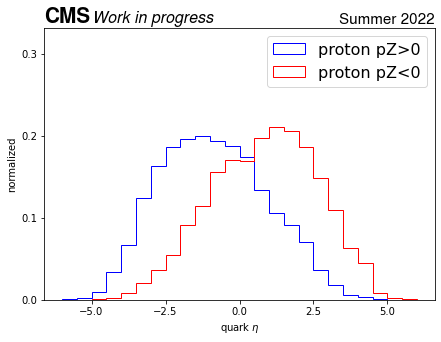

In [21]:
f, ax = plt.subplots(figsize=(7,5))
bins = np.linspace(start=-6,stop=6,num=25)
plt.hist(quark_eta[proton_pz>0], bins,density=True, histtype='step', label='proton pZ>0', color='b')
plt.hist(quark_eta[proton_pz<0], bins,density=True, histtype='step', label='proton pZ<0', color='r')
ax.legend(fontsize=16); 
ax.set_ylim([0, ax.get_ylim()[1]*1.5]) # set y axis to be a bit higher than maximal valus of the histogram to include the legend
hep.cms.label(llabel="Work in progress", rlabel="Summer 2022", ax=ax, fontsize=16)
ax.set(xlabel=r'quark $\eta$', ylabel='normalized')
plt.rcParams.update({'font.size': 20})
plt.savefig('quark_eta.png')

In fraction of events, W boson decays hadronicaly $W\to\ell\nu$, we can look at the lepton pseudorapidity for different event topologies

In [22]:
print('fraction of leptonic decays: %2.3f'%(np.average(isLeptonic_Decay)))

fraction of leptonic decays: 0.313


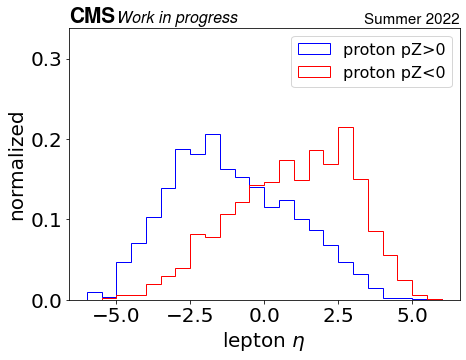

In [23]:
f, ax = plt.subplots(figsize=(7,5))
bins = np.linspace(start=-6,stop=6,num=25)
plt.hist(lepton_eta[(proton_pz>0) & (isLeptonic_Decay==1)], bins,density=True, histtype='step', label='proton pZ>0', color='b')
plt.hist(lepton_eta[(proton_pz<0) & (isLeptonic_Decay==1)], bins,density=True, histtype='step', label='proton pZ<0', color='r')
ax.legend(fontsize=16); 
ax.set_ylim([0, ax.get_ylim()[1]*1.5]) # set y axis to be a bit higher than maximal valus of the histogram to include the legend
hep.cms.label(llabel="Work in progress", rlabel="Summer 2022", ax=ax, fontsize=16)
ax.set(xlabel=r'lepton $\eta$', ylabel='normalized')
plt.rcParams.update({'font.size': 20})
plt.savefig('lepton_eta.png')